In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef, accuracy_score, balanced_accuracy_score, f1_score


In [2]:

dataset_s461_zeroshot = pd.read_csv('../DeltaDeltaG/s461_analysis.txt')

columns_selected = [
 "stability-oracle_dir","CartddgD_dir","PremPS_dir","PopMusic_dir","MAESTRO_dir",
"INPS3D_dir","DDGun3D_dir","DUET_dir","ACDC-NN_dir","KORPMD_dir","mCSM_dir",
"SDM_dir","ThermoNet_dir","I-Mutant3.0_dir","SAAFEC-Seq_dir", "mif_dir","ankh_dir",
"esm2_650M_dir","Dynamut_dir","mpnn_20_00_dir","esm1v_mean_dir",
"esmif_multimer_dir","mifst_dir","mutcomputex_dir","FoldXD_dir","tranception_dir","msa_transformer_mean_dir",'JanusDDG'
]
target_col = "ddG_dir"

janus_ddg  = pd.read_csv('../git_JANUS_DDG/Results/Result_s461_dir_analysis.csv')['DDG_JanusDDG']
dataset_s461_zeroshot['JanusDDG'] = janus_ddg.values


In [3]:
# Selezione delle colonne
columns_selected = ['JanusDDG', 'stability-oracle_dir', 'MAESTRO_dir', 'PremPS_dir', 'DDGun3D_dir']

df1 = dataset_s461_zeroshot.loc[:, columns_selected + ['ddG_dir']]#.dropna()

In [125]:

#df1 = pd.concat([df1,-df1],axis=0)

In [4]:
df1_Janus_min_0_5 = df1[(df1['JanusDDG'] > 0.5)]
df1_Janus_min_0_5.shape[0]

14

In [5]:
#con treshold di 0.5 ho la seguente dist. sperimentale

sperimental_stab = df1_Janus_min_0_5[df1_Janus_min_0_5['ddG_dir']>0.5].shape[0]
sperimental_neutral = df1_Janus_min_0_5[(df1_Janus_min_0_5['ddG_dir']<=0.5) & (df1_Janus_min_0_5['ddG_dir']>=-0.5)].shape[0]
sperimental_dest = df1_Janus_min_0_5[df1_Janus_min_0_5['ddG_dir']<-0.5].shape[0]

print(f'{sperimental_stab = }')
print(f'{sperimental_neutral = }')
print(f'{sperimental_dest = }')

sperimental_stab = 5
sperimental_neutral = 4
sperimental_dest = 5


In [128]:
#con la treshold a -0.5 ho 233 stabilizzanti, 54 neutre e 2 destabilizzanti

print('Percentuale stabilizzante sperim: ', sperimental_stab/df1_Janus_min_0_5.shape[0])
print('Percentuale neutra sperim: ', sperimental_neutral/df1_Janus_min_0_5.shape[0])
print('Percentuale destabilizzante sperim: ', sperimental_dest/df1_Janus_min_0_5.shape[0])

Percentuale stabilizzante sperim:  0.35714285714285715
Percentuale neutra sperim:  0.2857142857142857
Percentuale destabilizzante sperim:  0.35714285714285715


In [129]:
# Definendo le proteine stabilizzanti quelle con ddg < -0.5, quelle neutre con ddg < 0.5 o ddg > -0.5 e 
# destabilizzanti quelle con ddg > 0.5. Se considero le mutazioni con un DDG predetto da JanusDDG <-0.5,
# la distribuzione sperimentale è la seguente: sperimental_stab = 233(80%),
# sperimental_neutral = 56(19%), sperimental_dest = 2(1%). 
# Inoltre, di tutte le mutazioni sperimentalmente stabilizzanti (295), le proteine che predette stabilizzanti sono 233 (79%).



In [130]:
#di tutte le mutazioni sperimentalmente stabilizzanti (295)
df1_sperim_min_0_5 = df1[(df1['ddG_dir'] > 0.5)]
df1_sperim_min_0_5.shape[0]

23

In [131]:
#le proteine che predette stabilizzanti sono 233 (79%)
df1_sperim_min_0_5[df1_sperim_min_0_5['JanusDDG']>0.5].shape[0]

5

In [132]:
5/23

0.21739130434782608

In [133]:
df1

,JanusDDG,stability-oracle_dir,MAESTRO_dir,PremPS_dir,DDGun3D_dir,ddG_dir
0,-0.127955,-0.103,-0.761365,-0.44,0.5,-1.800
1,-0.636893,-0.950,-0.160758,-1.72,-1.2,-1.745
2,-0.239103,-0.040,0.047077,-0.42,-0.1,0.287
3,0.197891,0.025,-0.291217,-0.35,-0.1,-0.287
4,0.351094,-0.065,-0.805692,-0.22,0.0,-0.263
...,...,...,...,...,...,...
456,-1.357574,-0.155,0.317676,-0.99,-0.4,0.060
457,-0.154495,-0.046,0.577030,-1.18,-0.3,-0.460
458,-0.312050,0.026,-0.443163,-0.20,-0.3,-1.440
459,-0.164728,-0.164,0.062118,0.13,-0.2,-1.440


23
23
16
8
4
23
23
16
8
4
23
23
16
8
4
23
23
16
8
4
23
23
16
8
4


/home/guidobarducci/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/guidobarducci/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/guidobarducci/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/guidoba

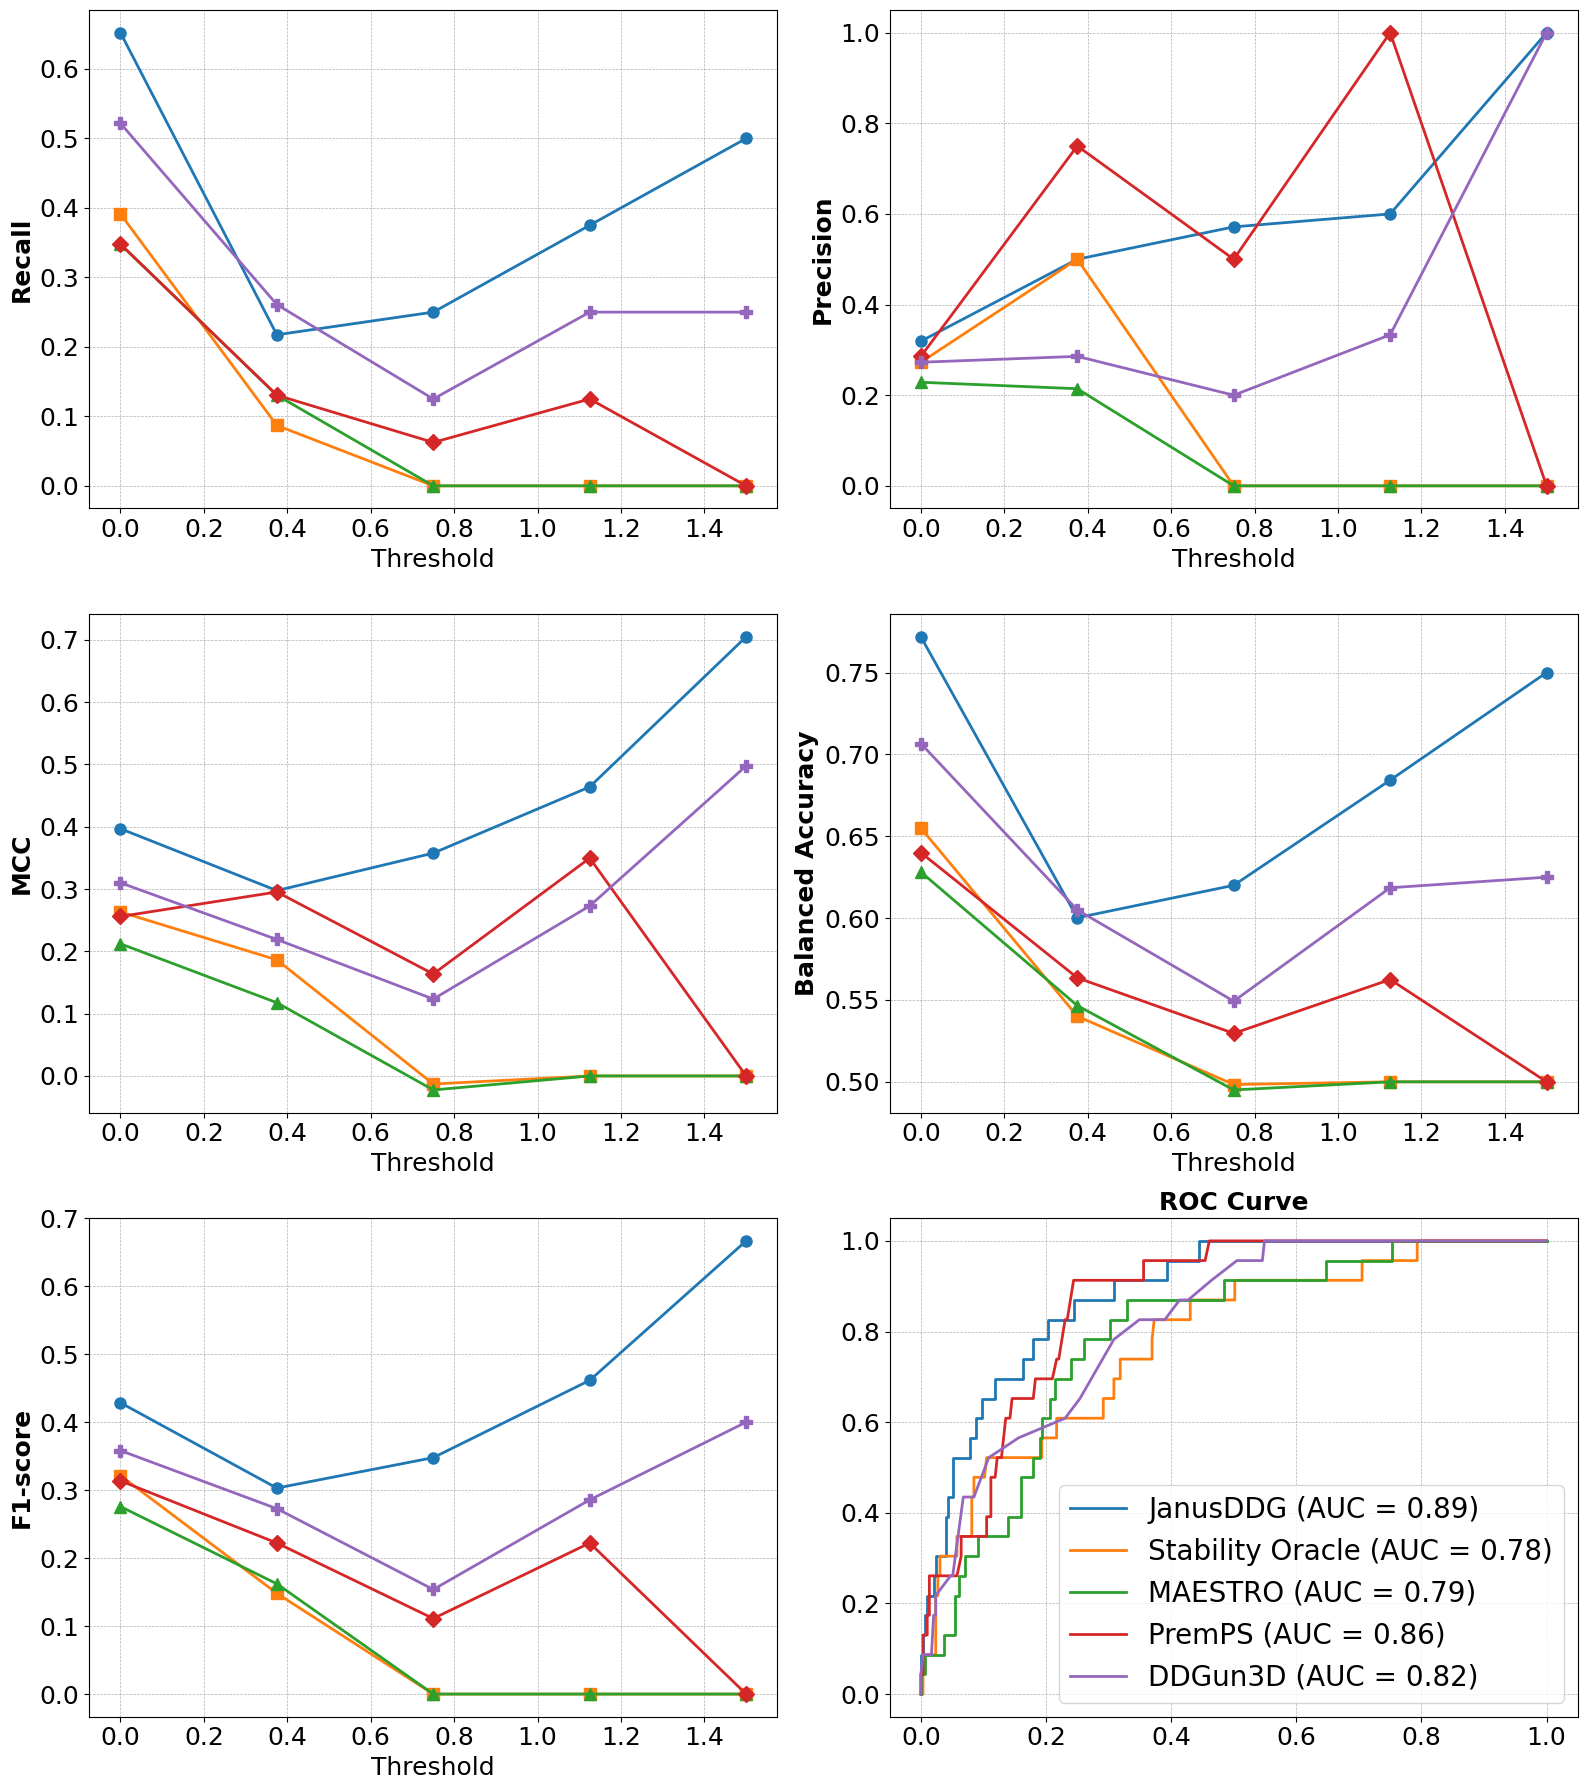

In [134]:
# Selezione delle colonne
columns_selected = ['JanusDDG', 'stability-oracle_dir', 'MAESTRO_dir', 'PremPS_dir', 'DDGun3D_dir']

df1 = dataset_s461_zeroshot.loc[:, columns_selected + ['ddG_dir']].dropna()
df1 = df1[(df1['ddG_dir'] < -0.5) | (df1['ddG_dir'] > 0.5)]

df1 = df1.rename(columns={'stability-oracle_dir': 'Stability Oracle', 'MAESTRO_dir':'MAESTRO','PremPS_dir':'PremPS','DDGun3D_dir':'DDGun3D'})
columns_selected=['Stability Oracle','MAESTRO','PremPS','DDGun3D']


# Definizione delle soglie per DDG (da -1.5 a 0)
thresholds = np.linspace(0, 1.5, 5)

# Funzione per calcolare precisione, richiamo, MCC, accuratezza, F1-score e AUC
from sklearn.metrics import roc_curve, auc

def calculate_metrics(model_preds, actual_ddg, thresholds):
    precision_vals = []
    recall_vals = []
    mcc_vals = []
    accuracy_vals = []
    f1_vals = []
    roc_auc = auc(*roc_curve(actual_ddg > 0, model_preds)[:2])  # Calcolo AUC
    
    for threshold in thresholds:
        predicted_labels = model_preds > threshold

        true_labels = actual_ddg > threshold
        print(sum(true_labels))

        precision = precision_score(true_labels, predicted_labels)
        recall = recall_score(true_labels, predicted_labels)
        mcc = matthews_corrcoef(true_labels, predicted_labels)
        balance_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
        f1 = f1_score(true_labels, predicted_labels)

        precision_vals.append(precision)
        recall_vals.append(recall)
        mcc_vals.append(mcc)
        accuracy_vals.append(balance_accuracy)
        f1_vals.append(f1)
    
    return precision_vals, recall_vals, mcc_vals, accuracy_vals, f1_vals, roc_auc

# Inizializzazione dei grafici
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 18))

# Definizione di marker e colori per ogni modello
markers = ['o', 's', '^', 'D', 'P']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Loop su ogni modello per calcolare le metriche e plottare i risultati
for i, model in enumerate([col for col in df1.columns if col != 'ddG_dir']):
    model_preds = df1[model].values
    actual_ddg = df1['ddG_dir'].values
    precision_vals, recall_vals, mcc_vals, accuracy_vals, f1_vals, roc_auc = calculate_metrics(model_preds, actual_ddg, thresholds)

    ax1.plot(thresholds, recall_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax2.plot(thresholds, precision_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax3.plot(thresholds, mcc_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax4.plot(thresholds, accuracy_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax5.plot(thresholds, f1_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    
    # Calcolo e plot della ROC Curve
    fpr, tpr, _ = roc_curve(actual_ddg > 0, model_preds)
    ax6.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})', color=colors[i], linewidth=2)

# Impostazione di titoli e legende
#ax1.set_title('Recall vs Threshold', fontsize=18)
ax1.set_xlabel('Threshold', fontsize=18)
ax1.set_ylabel('Recall', fontsize=18, fontweight='bold')
#ax1.legend(fontsize=15), loc='upper center', ncol=3, bbox_to_anchor=(0.4, 2))
ax1.tick_params(axis='both', which='major', labelsize=18)



#ax2.set_title('Precision vs Threshold', fontsize=18)
ax2.set_xlabel('Threshold', fontsize=18)
ax2.set_ylabel('Precision', fontsize=18,fontweight='bold')
#ax2.legend(fontsize=15, loc='lower right')
ax2.tick_params(axis='both', which='major', labelsize=18)


#ax3.set_title('MCC vs Threshold', fontsize=18)
ax3.set_xlabel('Threshold', fontsize=18)
ax3.set_ylabel('MCC', fontsize=18, fontweight='bold')
#ax3.legend(fontsize=15, loc='lower right')
ax3.tick_params(axis='both', which='major', labelsize=18)


#ax4.set_title('Balanced Accuracy vs Threshold', fontsize=18)
ax4.set_xlabel('Threshold', fontsize=18)
ax4.set_ylabel('Balanced Accuracy', fontsize=18, fontweight='bold')
#ax4.legend(fontsize=15, loc='lower right')
ax4.tick_params(axis='both', which='major', labelsize=18)


#ax5.set_title('F1-score vs Threshold', fontsize=18)
ax5.set_xlabel('Threshold', fontsize=18)
ax5.set_ylabel('F1-score', fontsize=18, fontweight='bold')
#ax5.legend(fontsize=15, loc='lower right')
ax5.tick_params(axis='both', which='major', labelsize=18)


ax6.set_title('ROC Curve', fontsize=18, fontweight='bold')
#ax6.set_xlabel('False Positive Rate', fontsize=18)
#ax6.set_ylabel('True Positive Rate', fontsize=18)
ax6.legend(fontsize=20, loc='lower right')
ax6.tick_params(axis='both', which='major', labelsize=18)


# Aggiungere griglie per facilitare la lettura
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Miglioramenti estetici: spaziatura e layout
plt.tight_layout()
plt.show()


In [138]:
# Definisce i colori della palette personalizzata
custom_colors = [ '#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["Pearson"]]

NameError: name 'df_plot_pearson' is not defined

/tmp/ipykernel_363912/424985834.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y=metric, palette=colors)
/tmp/ipykernel_363912/424985834.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y=metric, palette=colors)
/tmp/ipykernel_363912/424985834.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y=metric, palette=colors)
/tmp/ipykernel_363912/424985834.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

ValueError: [(0.7686274509803922, 0.25882352941176473, 0.10196078431372549, 1.0), (0.07058823529411765, 0.5647058823529412, 0.5568627450980392, 1.0), (0.20558246828143023, 0.6276355247981545, 0.6197923875432526, 1.0), (0.9104498269896194, 0.4648673587081892, 0.2170242214532872, 1.0), (0.6328489042675894, 0.7816839677047289, 0.7439446366782008, 1.0)] is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

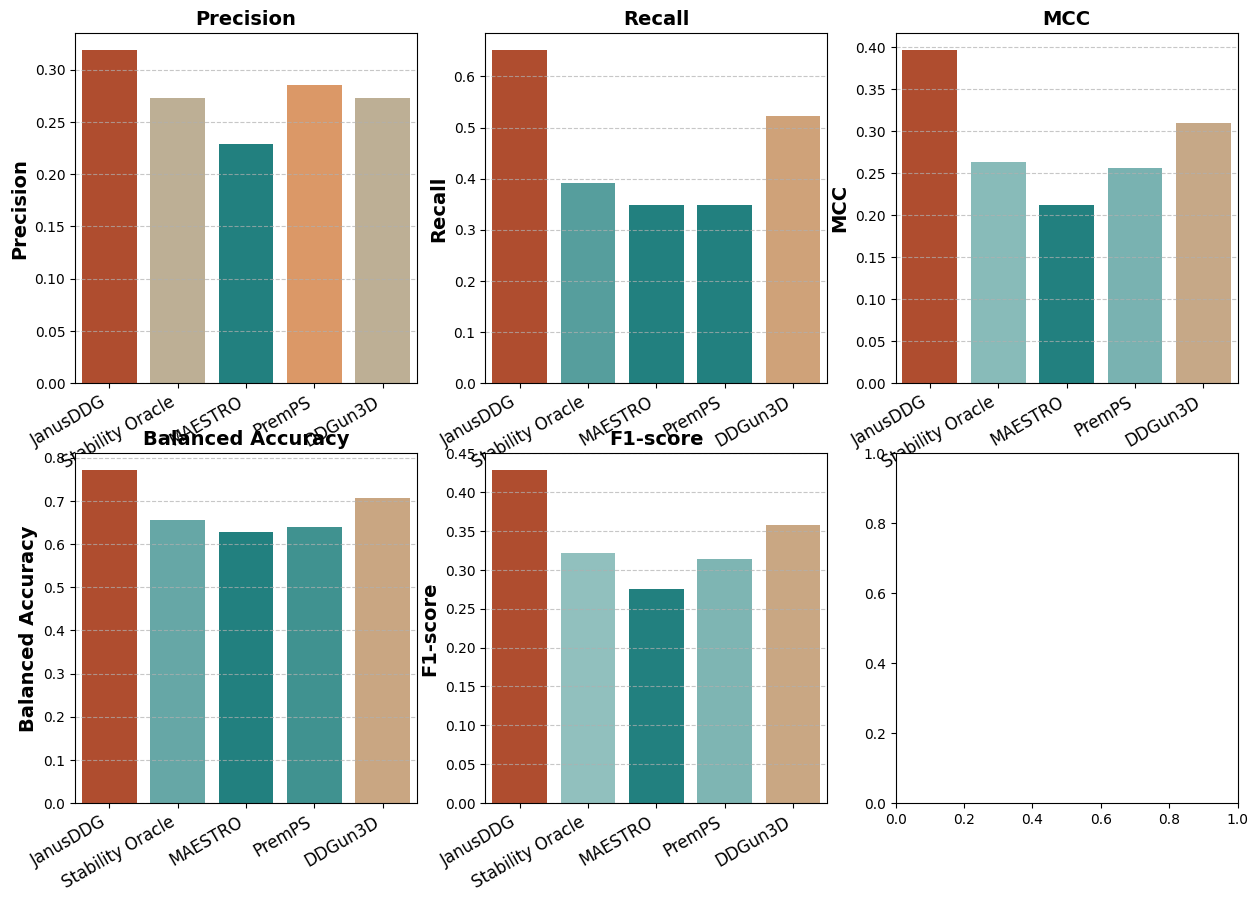

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef, balanced_accuracy_score, f1_score, roc_curve, auc

# Selezione delle colonne
columns_selected = ['JanusDDG', 'stability-oracle_dir', 'MAESTRO_dir', 'PremPS_dir', 'DDGun3D_dir']

df1 = dataset_s461_zeroshot.loc[:, columns_selected + ['ddG_dir']].dropna()
df1 = df1[(df1['ddG_dir'] < -0.5) | (df1['ddG_dir'] > 0.5)]

df1 = df1.rename(columns={'stability-oracle_dir': 'Stability Oracle', 
                          'MAESTRO_dir': 'MAESTRO', 
                          'PremPS_dir': 'PremPS', 
                          'DDGun3D_dir': 'DDGun3D'})

columns_selected = ['JanusDDG', 'Stability Oracle', 'MAESTRO', 'PremPS', 'DDGun3D']

# Soglia fissa a 0
threshold = 0

# Creazione di un dizionario per memorizzare le metriche
metrics_dict = {'Model': [], 'Precision': [], 'Recall': [], 'MCC': [], 'Balanced Accuracy': [], 'F1-score': [], 'AUC': []}

for model in columns_selected:
    model_preds = df1[model].values
    actual_ddg = df1['ddG_dir'].values
    
    predicted_labels = model_preds > threshold
    true_labels = actual_ddg > threshold

    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    balance_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    
    fpr, tpr, _ = roc_curve(true_labels, model_preds)
    roc_auc = auc(fpr, tpr)
    
    # Calcolo e plot della ROC Curve
    fpr, tpr, _ = roc_curve(actual_ddg > 0, model_preds)
    
    # Salviamo le metriche nel dizionario
    metrics_dict['Model'].append(model)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['MCC'].append(mcc)
    metrics_dict['Balanced Accuracy'].append(balance_accuracy)
    metrics_dict['F1-score'].append(f1)
    metrics_dict['AUC'].append(roc_auc)

# Convertiamo il dizionario in un DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Creazione dei barplot per ogni metrica
metrics_list = ['Precision', 'Recall', 'MCC', 'Balanced Accuracy', 'F1-score', 'AUC']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics_list, 1):

    # Definisce i colori della palette personalizzata
    custom_colors = [ '#12908E','#97CECC','#F98F45', '#c4421A']
    # Crea una colormap continua basata sui colori forniti
    cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)
    
    # Normalizza i valori per la mappatura del colore
    norm = plt.Normalize(metrics_df[metric].min(), metrics_df[metric].max()*1)
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    
    # Assegna un colore basato sul valore di Pearson
    colors = [sm.to_rgba(val) for val in metrics_df[metric]]

    if i ==6:
        plt.subplot(2, 3, i)
        plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})', color=colors, linewidth=2)    
    else:
        plt.subplot(2, 3, i)
        sns.barplot(data=metrics_df, x='Model', y=metric, palette=colors)
        plt.xticks(rotation=30, ha='right', fontsize=12)
        plt.ylabel(metric, fontsize=14, fontweight='bold')
        plt.xlabel('')
        plt.title(f'{metric}', fontsize=14, fontweight='bold')
        plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.tight_layout()
plt.show()


/tmp/ipykernel_363912/3196920553.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y=metric, palette=colors)
/tmp/ipykernel_363912/3196920553.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y=metric, palette=colors)
/tmp/ipykernel_363912/3196920553.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y=metric, palette=colors)
/tmp/ipykernel_363912/3196920553.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

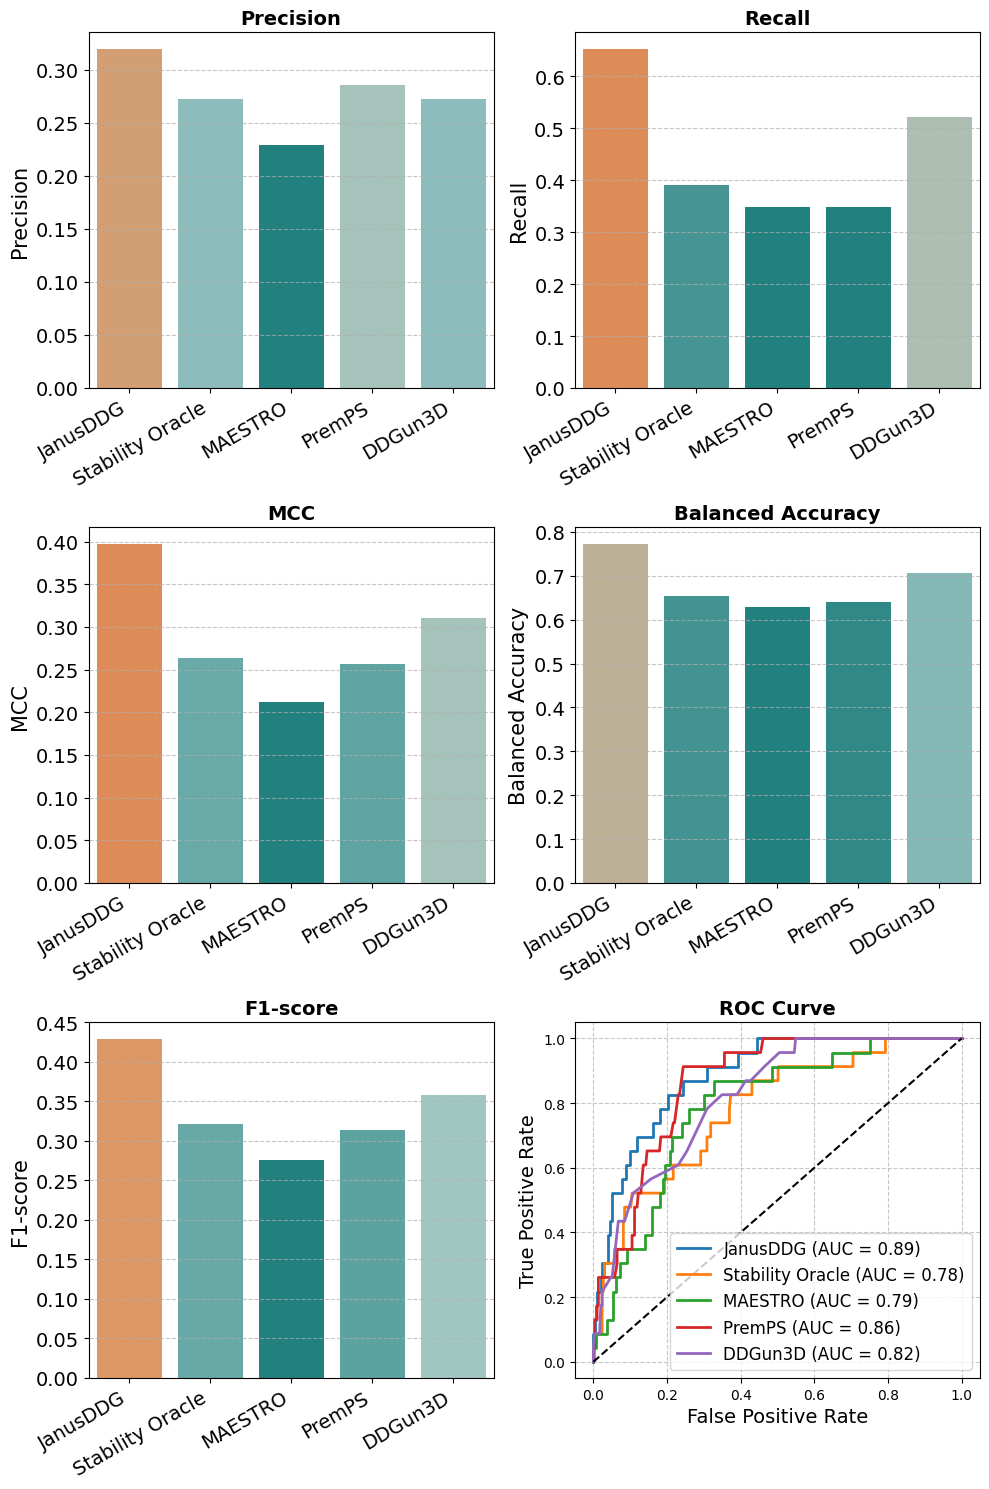

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef, balanced_accuracy_score, f1_score, roc_curve, auc
from matplotlib.colors import LinearSegmentedColormap

# Selezione delle colonne
columns_selected = ['JanusDDG', 'stability-oracle_dir', 'MAESTRO_dir', 'PremPS_dir', 'DDGun3D_dir']

df1 = dataset_s461_zeroshot.loc[:, columns_selected + ['ddG_dir']].dropna()
df1 = df1[(df1['ddG_dir'] < -0.5) | (df1['ddG_dir'] > 0.5)]

df1 = df1.rename(columns={'stability-oracle_dir': 'Stability Oracle', 
                          'MAESTRO_dir': 'MAESTRO', 
                          'PremPS_dir': 'PremPS', 
                          'DDGun3D_dir': 'DDGun3D'})

columns_selected = ['JanusDDG', 'Stability Oracle', 'MAESTRO', 'PremPS', 'DDGun3D']

# Soglia fissa a 0
threshold = 0

# Creazione di un dizionario per memorizzare le metriche
metrics_dict = {'Model': [], 'Precision': [], 'Recall': [], 'MCC': [], 'Balanced Accuracy': [], 'F1-score': [], 'AUC': []}

# Dati per la ROC Curve
roc_curves = {}

for model in columns_selected:
    model_preds = df1[model].values
    actual_ddg = df1['ddG_dir'].values
    
    predicted_labels = model_preds > threshold
    true_labels = actual_ddg > threshold

    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    balance_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    
    # Calcolo ROC Curve
    fpr, tpr, _ = roc_curve(true_labels, model_preds)
    roc_auc = auc(fpr, tpr)
    
    # Salvataggio per il plot della ROC Curve
    roc_curves[model] = (fpr, tpr, roc_auc)

    # Salviamo le metriche nel dizionario
    metrics_dict['Model'].append(model)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['MCC'].append(mcc)
    metrics_dict['Balanced Accuracy'].append(balance_accuracy)
    metrics_dict['F1-score'].append(f1)
    metrics_dict['AUC'].append(roc_auc)

# Convertiamo il dizionario in un DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Creazione dei barplot per ogni metrica
metrics_list = ['Precision', 'Recall', 'MCC', 'Balanced Accuracy', 'F1-score', 'AUC']
plt.figure(figsize=(10, 15))

# Palette personalizzata
custom_colors = ['#12908E', '#97CECC', '#F98F45', '#c4421A']
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

for i, metric in enumerate(metrics_list[:-1], 1):
    # Normalizza i valori per la mappatura del colore
    norm = plt.Normalize(metrics_df[metric].min(), metrics_df[metric].max() * 1.2)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = [sm.to_rgba(val) for val in metrics_df[metric]]

    plt.subplot(3, 2, i)
    sns.barplot(data=metrics_df, x='Model', y=metric, palette=colors)
    plt.xticks(rotation=30, ha='right', fontsize=14)
    plt.yticks(fontsize=14)

    plt.ylabel(metric, fontsize=15)
    plt.xlabel('')
    plt.title(f'{metric}', fontsize=14, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Aggiunta della ROC Curve nel sesto subplot
plt.subplot(3, 2, 6)
for model, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')  # Linea diagonale (random classifier)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [135]:
thresholds

array([0.   , 0.375, 0.75 , 1.125, 1.5  ])

In [40]:
df = pd.read_csv('../git_JANUS_DDG/Results/Result_s669_to_process.csv')[['DDG','DDG_JanusDDG']]

In [41]:
df_tot = pd.concat([df,-df], axis= 0)
df_tot

,DDG,DDG_JanusDDG
0,-1.800,-0.127955
1,-2.690,-0.145605
2,-1.980,0.189196
3,-1.700,-0.078648
4,-1.360,-0.432737
...,...,...
664,-0.600,0.657829
665,-0.500,-1.300351
666,2.500,1.112379
667,1.900,1.259597


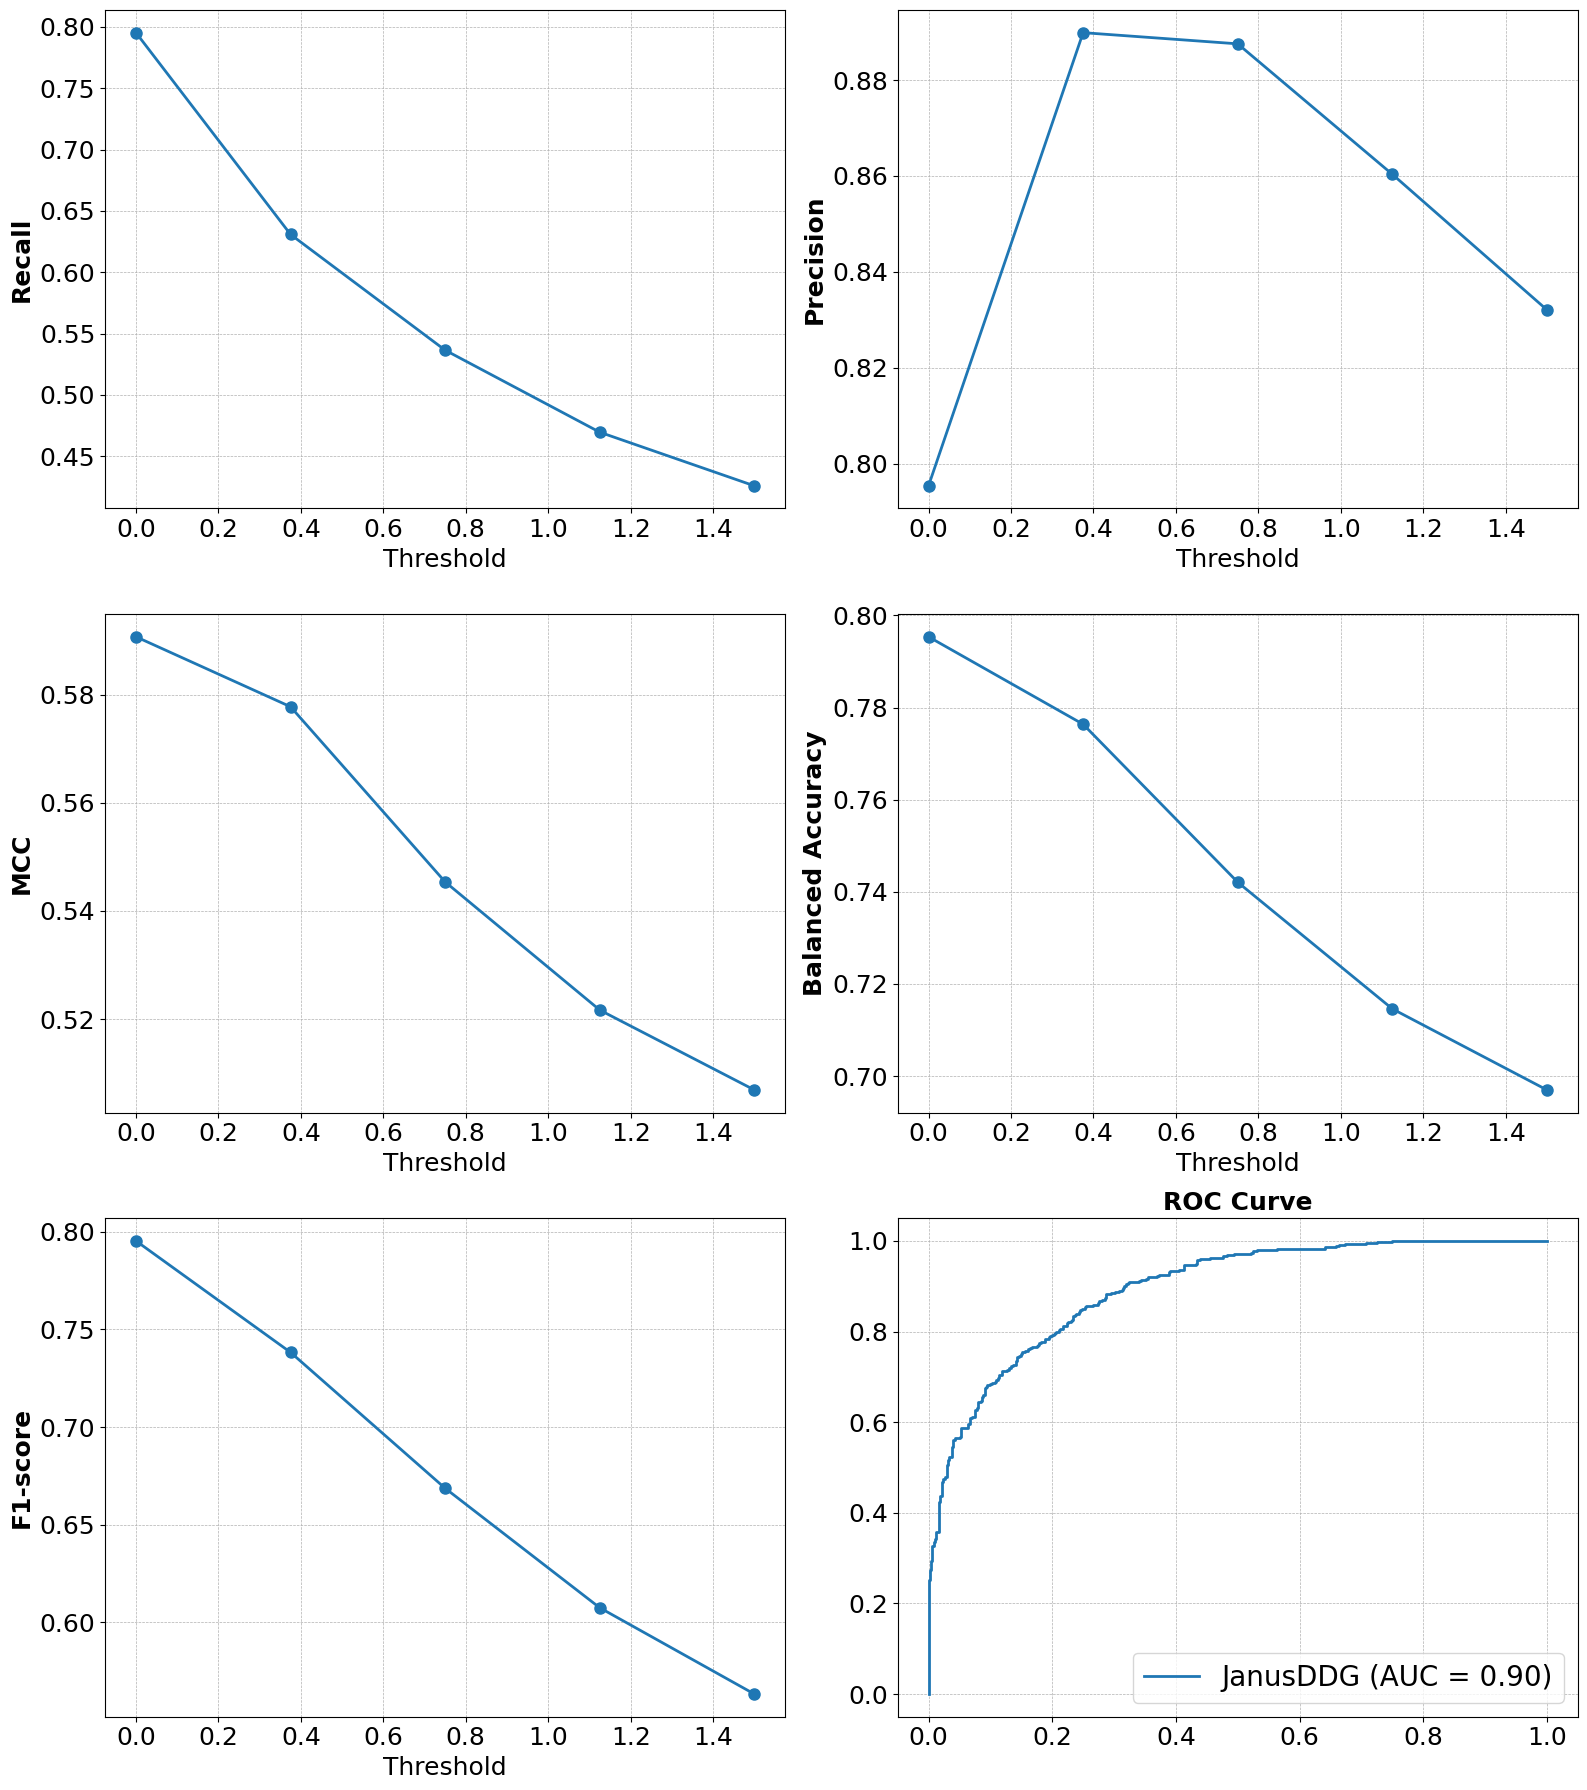

In [42]:
# Selezione delle colonne
df_tot = df_tot[(df_tot['DDG'] < -0.5) | (df_tot['DDG'] > 0.5)]

df_tot = df_tot.rename(columns={'DDG_JanusDDG': 'JanusDDG'})
columns_selected=['JanusDDG']


# Definizione delle soglie per DDG (da -1.5 a 0)
thresholds = np.linspace(0, 1.5, 5)

# Funzione per calcolare precisione, richiamo, MCC, accuratezza, F1-score e AUC
from sklearn.metrics import roc_curve, auc

def calculate_metrics(model_preds, actual_ddg, thresholds):
    precision_vals = []
    recall_vals = []
    mcc_vals = []
    accuracy_vals = []
    f1_vals = []
    roc_auc = auc(*roc_curve(actual_ddg > 0, model_preds)[:2])  # Calcolo AUC
    
    for threshold in thresholds:
        predicted_labels = model_preds > threshold
        true_labels = actual_ddg > threshold

        precision = precision_score(true_labels, predicted_labels)
        recall = recall_score(true_labels, predicted_labels)
        mcc = matthews_corrcoef(true_labels, predicted_labels)
        balance_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
        f1 = f1_score(true_labels, predicted_labels)

        precision_vals.append(precision)
        recall_vals.append(recall)
        mcc_vals.append(mcc)
        accuracy_vals.append(balance_accuracy)
        f1_vals.append(f1)
    
    return precision_vals, recall_vals, mcc_vals, accuracy_vals, f1_vals, roc_auc

# Inizializzazione dei grafici
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 18))

# Definizione di marker e colori per ogni modello
markers = ['o',]
colors = ['#1f77b4',]

# Loop su ogni modello per calcolare le metriche e plottare i risultati
for i, model in enumerate([col for col in df_tot.columns if col != 'DDG']):
    model_preds = df_tot[model].values
    actual_ddg = df_tot['DDG'].values
    precision_vals, recall_vals, mcc_vals, accuracy_vals, f1_vals, roc_auc = calculate_metrics(model_preds, actual_ddg, thresholds)

    ax1.plot(thresholds, recall_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax2.plot(thresholds, precision_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax3.plot(thresholds, mcc_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax4.plot(thresholds, accuracy_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax5.plot(thresholds, f1_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    
    # Calcolo e plot della ROC Curve
    fpr, tpr, _ = roc_curve(actual_ddg < 0, -model_preds)
    ax6.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})', color=colors[i], linewidth=2)

# Impostazione di titoli e legende
#ax1.set_title('Recall vs Threshold', fontsize=18)
ax1.set_xlabel('Threshold', fontsize=18)
ax1.set_ylabel('Recall', fontsize=18, fontweight='bold')
#ax1.legend(fontsize=15), loc='upper center', ncol=3, bbox_to_anchor=(0.4, 2))
ax1.tick_params(axis='both', which='major', labelsize=18)



#ax2.set_title('Precision vs Threshold', fontsize=18)
ax2.set_xlabel('Threshold', fontsize=18)
ax2.set_ylabel('Precision', fontsize=18,fontweight='bold')
#ax2.legend(fontsize=15, loc='lower right')
ax2.tick_params(axis='both', which='major', labelsize=18)


#ax3.set_title('MCC vs Threshold', fontsize=18)
ax3.set_xlabel('Threshold', fontsize=18)
ax3.set_ylabel('MCC', fontsize=18, fontweight='bold')
#ax3.legend(fontsize=15, loc='lower right')
ax3.tick_params(axis='both', which='major', labelsize=18)


#ax4.set_title('Balanced Accuracy vs Threshold', fontsize=18)
ax4.set_xlabel('Threshold', fontsize=18)
ax4.set_ylabel('Balanced Accuracy', fontsize=18, fontweight='bold')
#ax4.legend(fontsize=15, loc='lower right')
ax4.tick_params(axis='both', which='major', labelsize=18)


#ax5.set_title('F1-score vs Threshold', fontsize=18)
ax5.set_xlabel('Threshold', fontsize=18)
ax5.set_ylabel('F1-score', fontsize=18, fontweight='bold')
#ax5.legend(fontsize=15, loc='lower right')
ax5.tick_params(axis='both', which='major', labelsize=18)


ax6.set_title('ROC Curve', fontsize=18, fontweight='bold')
#ax6.set_xlabel('False Positive Rate', fontsize=18)
#ax6.set_ylabel('True Positive Rate', fontsize=18)
ax6.legend(fontsize=20, loc='lower right')
ax6.tick_params(axis='both', which='major', labelsize=18)


# Aggiungere griglie per facilitare la lettura
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Miglioramenti estetici: spaziatura e layout
plt.tight_layout()
plt.show()


In [11]:
#SOTTO L'ANALISI COMPLETA VECCHIA 

In [12]:
# Selezione delle colonne
columns_selected = ['JanusDDG', 'stability-oracle_dir', 'MAESTRO_dir', 'PremPS_dir', 'DDGun3D_dir']

df1 = dataset_s461_zeroshot.loc[:, columns_selected + ['ddG_dir']].dropna()
#df1 = df1[(df1['ddG_dir'] < -0.5) | (df1['ddG_dir'] > 0.5)]

In [13]:
sum(df1['ddG_dir']>0)


73

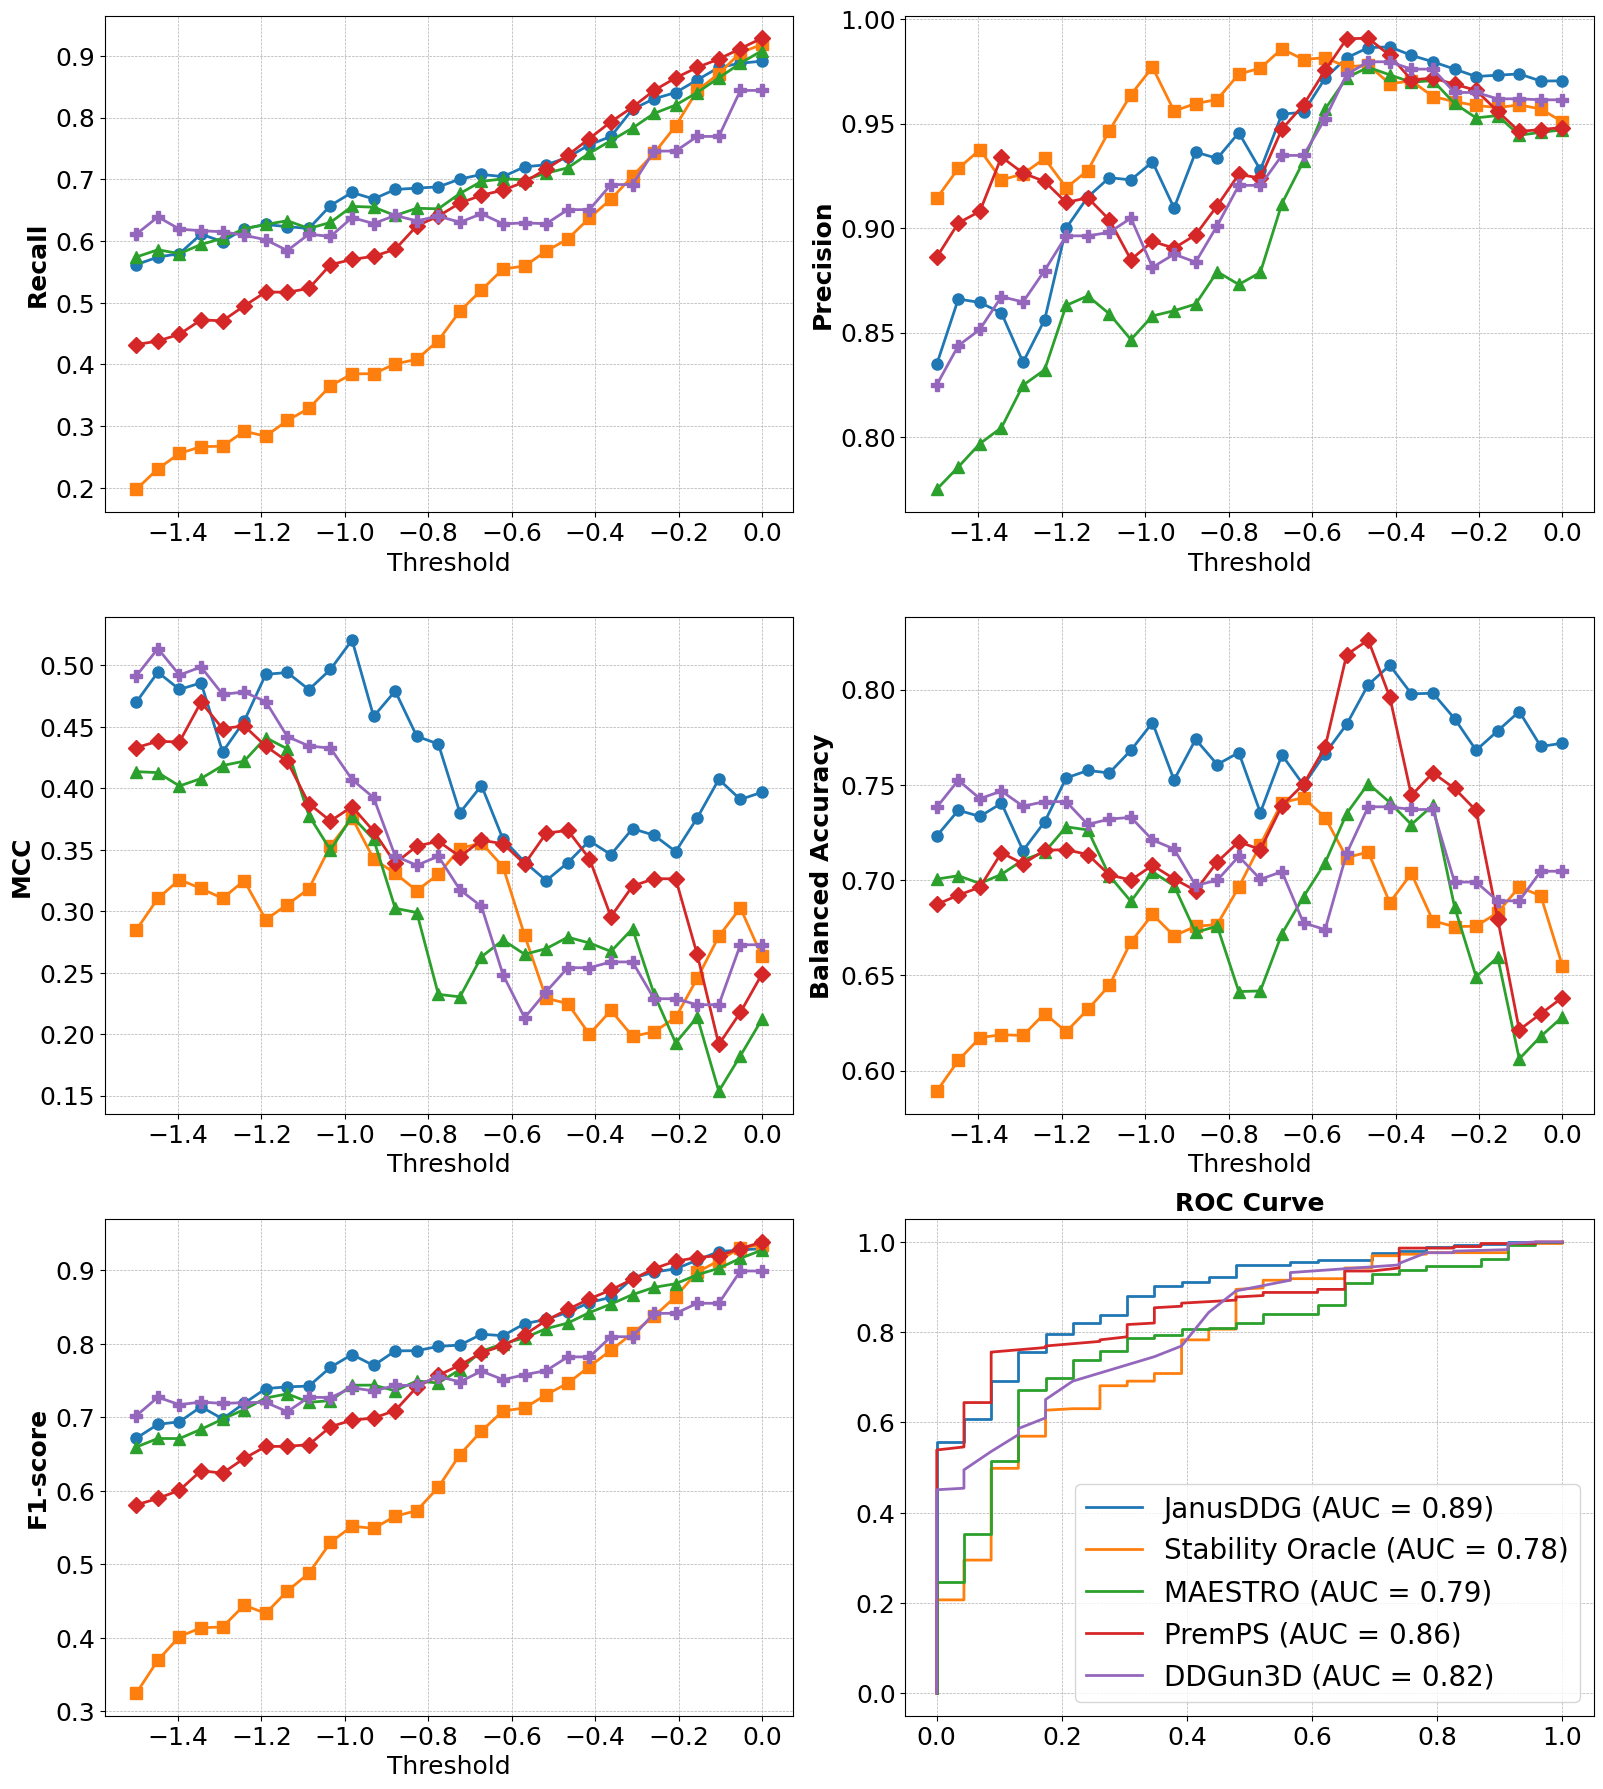

In [14]:
# Selezione delle colonne
columns_selected = ['JanusDDG', 'stability-oracle_dir', 'MAESTRO_dir', 'PremPS_dir', 'DDGun3D_dir']

df1 = dataset_s461_zeroshot.loc[:, columns_selected + ['ddG_dir']].dropna()
df1 = df1[(df1['ddG_dir'] < -0.5) | (df1['ddG_dir'] > 0.5)]

df1 = df1.rename(columns={'stability-oracle_dir': 'Stability Oracle', 'MAESTRO_dir':'MAESTRO','PremPS_dir':'PremPS','DDGun3D_dir':'DDGun3D'})
columns_selected=['Stability Oracle','MAESTRO','PremPS','DDGun3D']


# Definizione delle soglie per DDG (da -1.5 a 0)
thresholds = np.linspace(-1.5, 0, 30)

# Funzione per calcolare precisione, richiamo, MCC, accuratezza, F1-score e AUC
from sklearn.metrics import roc_curve, auc

def calculate_metrics(model_preds, actual_ddg, thresholds):
    precision_vals = []
    recall_vals = []
    mcc_vals = []
    accuracy_vals = []
    f1_vals = []
    roc_auc = auc(*roc_curve(actual_ddg < 0, -model_preds)[:2])  # Calcolo AUC
    
    for threshold in thresholds:
        predicted_labels = model_preds < threshold
        true_labels = actual_ddg < threshold

        precision = precision_score(true_labels, predicted_labels)
        recall = recall_score(true_labels, predicted_labels)
        mcc = matthews_corrcoef(true_labels, predicted_labels)
        balance_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
        f1 = f1_score(true_labels, predicted_labels)

        precision_vals.append(precision)
        recall_vals.append(recall)
        mcc_vals.append(mcc)
        accuracy_vals.append(balance_accuracy)
        f1_vals.append(f1)
    
    return precision_vals, recall_vals, mcc_vals, accuracy_vals, f1_vals, roc_auc

# Inizializzazione dei grafici
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 18))

# Definizione di marker e colori per ogni modello
markers = ['o', 's', '^', 'D', 'P']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Loop su ogni modello per calcolare le metriche e plottare i risultati
for i, model in enumerate([col for col in df1.columns if col != 'ddG_dir']):
    model_preds = df1[model].values
    actual_ddg = df1['ddG_dir'].values
    precision_vals, recall_vals, mcc_vals, accuracy_vals, f1_vals, roc_auc = calculate_metrics(model_preds, actual_ddg, thresholds)

    ax1.plot(thresholds, recall_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax2.plot(thresholds, precision_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax3.plot(thresholds, mcc_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax4.plot(thresholds, accuracy_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    ax5.plot(thresholds, f1_vals, label=model, color=colors[i], marker=markers[i], markersize=8, linewidth=2)
    
    # Calcolo e plot della ROC Curve
    fpr, tpr, _ = roc_curve(actual_ddg < 0, -model_preds)
    ax6.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})', color=colors[i], linewidth=2)

# Impostazione di titoli e legende
#ax1.set_title('Recall vs Threshold', fontsize=18)
ax1.set_xlabel('Threshold', fontsize=18)
ax1.set_ylabel('Recall', fontsize=18, fontweight='bold')
#ax1.legend(fontsize=15), loc='upper center', ncol=3, bbox_to_anchor=(0.4, 2))
ax1.tick_params(axis='both', which='major', labelsize=18)



#ax2.set_title('Precision vs Threshold', fontsize=18)
ax2.set_xlabel('Threshold', fontsize=18)
ax2.set_ylabel('Precision', fontsize=18,fontweight='bold')
#ax2.legend(fontsize=15, loc='lower right')
ax2.tick_params(axis='both', which='major', labelsize=18)


#ax3.set_title('MCC vs Threshold', fontsize=18)
ax3.set_xlabel('Threshold', fontsize=18)
ax3.set_ylabel('MCC', fontsize=18, fontweight='bold')
#ax3.legend(fontsize=15, loc='lower right')
ax3.tick_params(axis='both', which='major', labelsize=18)


#ax4.set_title('Balanced Accuracy vs Threshold', fontsize=18)
ax4.set_xlabel('Threshold', fontsize=18)
ax4.set_ylabel('Balanced Accuracy', fontsize=18, fontweight='bold')
#ax4.legend(fontsize=15, loc='lower right')
ax4.tick_params(axis='both', which='major', labelsize=18)


#ax5.set_title('F1-score vs Threshold', fontsize=18)
ax5.set_xlabel('Threshold', fontsize=18)
ax5.set_ylabel('F1-score', fontsize=18, fontweight='bold')
#ax5.legend(fontsize=15, loc='lower right')
ax5.tick_params(axis='both', which='major', labelsize=18)


ax6.set_title('ROC Curve', fontsize=18, fontweight='bold')
#ax6.set_xlabel('False Positive Rate', fontsize=18)
#ax6.set_ylabel('True Positive Rate', fontsize=18)
ax6.legend(fontsize=20, loc='lower right')
ax6.tick_params(axis='both', which='major', labelsize=18)


# Aggiungere griglie per facilitare la lettura
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Miglioramenti estetici: spaziatura e layout
plt.tight_layout()
plt.show()


In [15]:
df1

,JanusDDG,Stability Oracle,MAESTRO,PremPS,DDGun3D,ddG_dir
0,-0.127955,-0.103,-0.761365,-0.44,0.5,-1.800
1,-0.636893,-0.950,-0.160758,-1.72,-1.2,-1.745
5,-1.112420,0.257,-0.452080,-0.48,0.5,-0.700
7,0.015123,-0.759,-0.739629,-0.41,0.3,-0.821
9,-0.576618,0.115,-0.518283,0.07,-0.0,-0.580
...,...,...,...,...,...,...
453,-0.286486,-1.193,-0.243300,-0.40,-1.0,0.890
454,-0.358166,-1.243,-0.767261,-0.43,-0.9,-1.435
458,-0.312050,0.026,-0.443163,-0.20,-0.3,-1.440
459,-0.164728,-0.164,0.062118,0.13,-0.2,-1.440


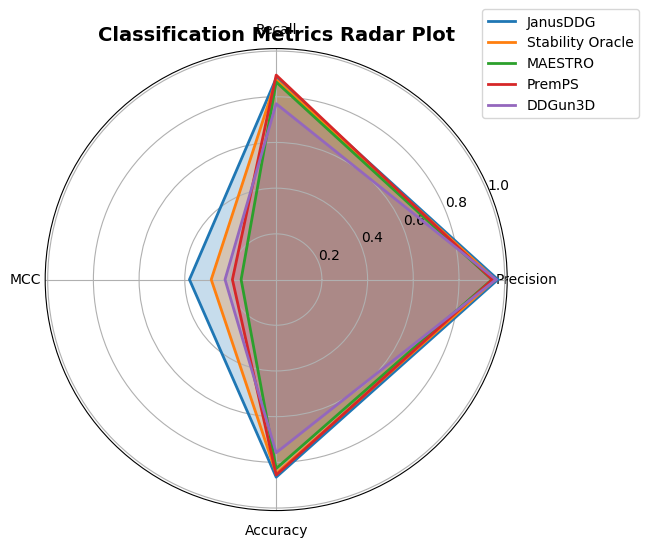

In [16]:
# Funzione per calcolare le metriche
def calculate_metrics(model_preds, actual_ddg, threshold=-0.1):
    predicted_labels = model_preds < threshold
    true_labels = actual_ddg < threshold

    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)

    return [precision, recall, mcc, accuracy]

# Definizione delle metriche e del numero di variabili nel radar plot
metrics_labels = ['Precision', 'Recall', 'MCC', 'Accuracy']

# Calcolo metriche per ogni modello in df1
df1_models = [col for col in df1.columns if col != 'ddG_dir']
model_metrics = {}

for model in df1_models:
    model_metrics[model] = calculate_metrics(df1[model].values, df1['ddG_dir'].values)

# Creazione del radar plot
def plot_radar(data, labels, title):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Chiudere il cerchio

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for model, values in data.items():
        values += values[:1]  # Chiudere il cerchio
        ax.plot(angles, values, label=model, linewidth=2)
        ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Plot del radar chart
plot_radar(model_metrics, metrics_labels, "Classification Metrics Radar Plot")


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# columns_selected = ['JanusDDG',
#                     'PopMusic_dir',
#                     'stability-oracle_dir',
#                     'CartddgD_dir',
#                     'MAESTRO_dir',
#                     'DDGun3D_dir',]

# #df1 =dataset_s461_zeroshot.loc[:, columns_selected + ['ddG_dir']].fillna(0)

#df1 = df1.rename(columns={'stability-oracle_dir':'Stability-Oracle', 'CartddgD_dir':'Rosetta Cartesian ddg'})

# columns_selected = ['JanusDDG',
#                     'Rosetta Cartesian ddg',
#                     'PopMusic_dir',
#                     'Stability-Oracle',
#                      'DDGun3D_dir',
#                      'MAESTRO_dir',]

# Function to calculate FPR, TPR for ROC curve
def calculate_roc_curve(model_preds, actual_ddg):
    fpr, tpr, thresholds = roc_curve(actual_ddg > 0, model_preds)  # Actual labels based on threshold 0
    return fpr, tpr

# List of model columns
model_columns = columns_selected

# Initialize lists to hold FPR, TPR, and AUC values
fprs = []
tprs = []
auc_scores = []

# Calculate ROC curve for each model
for model_name in model_columns:
    model_preds = df1[model_name].values
    actual_ddg = df1['ddG_dir'].values
    fpr, tpr = calculate_roc_curve(model_preds, actual_ddg)
    auc = roc_auc_score(actual_ddg > 0, model_preds)
    
    fprs.append(fpr)
    tprs.append(tpr)
    auc_scores.append(auc)


In [18]:
from sklearn.metrics import precision_recall_curve, auc
df1 = df1.rename(columns={'stability-oracle_dir':'Stability-Oracle', 'CartddgD_dir':'Rosetta Cartesian ddg'})

# Calcolare precisione e recall
precision_oracle, recall_oracle, _ = precision_recall_curve(df1['ddG_dir']<0, df1['Stability-Oracle']<0)
precision_rosetta, recall_rosetta, _ = precision_recall_curve(df1['ddG_dir']<0, df1['Rosetta Cartesian ddg']<0)
precision_janus, recall_janus, _ = precision_recall_curve(df1['ddG_dir']<0, df1['JanusDDG']<0)


# Calcolare l'AUC della Precision-Recall curve
pr_auc_janus = auc(recall_janus, precision_janus)
pr_auc_oracle = auc(recall_oracle, precision_oracle)
pr_auc_rosetta = auc(recall_rosetta, precision_rosetta)

# Visualizzare la PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_janus, precision_janus, label=f'PR AUC janus = {pr_auc_janus:.2f}')
plt.plot(recall_oracle, precision_oracle, label=f'PR AUC stabilityOracle = {pr_auc_oracle:.2f}')
plt.plot(recall_rosetta, precision_rosetta, label=f'PR AUC Rosetta = {pr_auc_rosetta:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Stampa l'area sotto la curva PR
print(f"PR AUC: {pr_auc_janus:.2f}")

KeyError: 'Stability-Oracle'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.colors import LinearSegmentedColormap

# Definisci i colori personalizzati
custom_colors = ['#97CECC', '#12908E','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=len(model_columns))

# Genera la palette dai colori interpolati
palette = [cmap(i / (len(model_columns) - 1)) for i in range(len(model_columns))]

# Crea la figura con un DPI elevato per una migliore qualità
plt.figure(figsize=(12, 8), dpi=300)


# Plot di ogni modello con la nuova palette di colori
for i, model_name in enumerate(model_columns):
    m_n = model_name.split('_')[0]
    plt.plot(fprs[i], tprs[i], label=f'{m_n} (AUC = {auc_scores[i]:.2f})', 
             color=palette[i], linewidth=2)

# Plot della diagonale (classificatore casuale) come linea tratteggiata
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)

# Aggiunta del titolo e delle etichette con dimensione maggiore
plt.title('S461 ROC Curve', fontsize=20, fontweight='bold')
plt.xlabel('False Positive Rate (FPR)', fontsize=16, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=16, fontweight='bold')

# Personalizzazione della legenda
plt.legend(loc='lower right', fontsize=14, frameon=False, markerscale=1.5)

# Aggiunta di una griglia per una migliore leggibilità
plt.grid(True, linestyle='--', alpha=0.7)

# Imposta i limiti degli assi per una visualizzazione chiara
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Miglioramenti finali per un aspetto più pulito
plt.tight_layout()

# Mostra il grafico
plt.show()


In [ ]:
assert False

In [ ]:
# from scipy.stats import kendalltau
# df = pd.read_csv('../git_JANUS_DDG/Results/Result_s669_to_process.csv')
# spearmanr(df['DDG_JanusDDG'].values, df['DDG'].values)

In [ ]:
import pandas as pd

# Creazione del DataFrame
data = {
    "Method": [
        "SDM", "ThermoNet", "mCSM", "Dynamut", "I-Mutant3.0", "MAESTRO", "DUET", "ACDC-NN", "FoldX", "PoPMuSiC", "DDGun3D", "PremPS", "DDMut", "INPS3D", "GeoDDG-3D (old)", "RaSP", "Pythia", "ThermoMPNN",
        "MUPro", "I-Mutant3.0-Seq", "SAAFEC-SEQ", "ACDC-NN-Seq", "INPS-Seq", "DDGun", "PROSTATA", "Mutate everything (ESM-2)", "GeoDDG-Seq (old)", "SPIRED-Fitness (zero-shot)", "GeoStab v2", "SPIRED-Stab"
    ],
    "ρ": [0.31, 0.31, 0.33, 0.34, 0.34, 0.35, 0.38, 0.40, 0.41, 0.42, 0.43, 0.45, 0.46, 0.46, 0.50, 0.52, 0.55, 0.56,
          0.18, 0.22, 0.34, 0.39, 0.40, 0.45, 0.50, 0.50, 0.51, 0.54, 0.55, 0.58],
    "τ": [0.22, 0.22, 0.23, 0.25, 0.26, 0.26, 0.27, 0.30, 0.31, 0.30, 0.32, 0.33, 0.35, 0.35, 0.38, 0.39, 0.41, 0.42,
          0.13, 0.16, 0.26, 0.29, 0.28, 0.34, 0.36, 0.38, 0.39, 0.41, 0.43, 0.46],
    "r": [0.33, 0.38, 0.35, 0.34, 0.39, 0.40, 0.41, 0.42, 0.36, 0.45, 0.48, 0.48, 0.52, 0.48, 0.51, 0.50, 0.55, 0.53,
          0.21, 0.28, 0.39, 0.44, 0.44, 0.47, 0.53, 0.52, 0.52, 0.52, 0.54, 0.55],
    "Top-5": [0.33, 0.31, 0.39, 0.32, 0.39, 0.37, 0.40, 0.44, 0.36, 0.37, 0.41, 0.39, 0.44, 0.44, 0.53, 0.45, 0.49, 0.48,
               0.31, 0.33, 0.39, 0.43, 0.47, 0.44, 0.49, 0.41, 0.49, 0.51, 0.52, 0.59],
    "Top-10": [0.57, 0.54, 0.53, 0.52, 0.54, 0.59, 0.56, 0.57, 0.59, 0.63, 0.62, 0.58, 0.59, 0.59, 0.69, 0.62, 0.64, 0.63,
                0.53, 0.51, 0.54, 0.58, 0.56, 0.56, 0.62, 0.62, 0.63, 0.64, 0.69, 0.67]
}

# Creazione DataFrame
df = pd.DataFrame(data)

# Visualizza il DataFrame
df = df.rename(columns={'r':'Pearson','ρ':'Spearman','Method':'Feature'})
df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)

# Ordina i dati
df_plot_pearson = df.sort_values(by="Pearson")

# Definisce i colori della palette personalizzata
custom_colors = ['#97CECC', '#12908E','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["Pearson"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(
    y="Feature",
    x="Pearson",
    data=df_plot_pearson,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    edgecolor="black",  # Bordi per maggiore distinzione
    linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Pearson Correlation", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)

# Crea una colorbar separata
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("Pearson Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)

# Mostra il grafico
plt.tight_layout()
plt.show()


In [ ]:
assert False

In [ ]:
import pandas as pd
import numpy as np
# Dizionario per salvare i risultati
pearson_dict = {}
spearmanr_dict = {}
error = {}


for model in columns_selected:
    dataset_2 = dataset.copy()
    dataset_2=dataset_2.fillna(0)
    pearson_dict[model] = pearsonr(dataset_2.loc[:,model].values,dataset_2.loc[:,target_col].values)[0]


for model in columns_selected:

    dataset_2 = dataset.copy()
    dataset_2=dataset_2.fillna(0)
    spearmanr_dict[model] = spearmanr(dataset_2.loc[:,model].values,dataset_2.loc[:,target_col].values)[0]

for model in columns_selected:

    dataset_2 = dataset.copy()
    dataset_2=dataset_2.fillna(0)

    # Calcola gli errori quadratici per ogni punto
    errors = (dataset_2.loc[:,model].values - dataset_2.loc[:,target_col].values) ** 2
    error[model] = np.std(errors, ddof=1)  #


In [ ]:
error

In [ ]:
pearson_dict['JanusDDG']=janus_pearson
spearmanr_dict['JanusDDG']=janus_spearman


In [ ]:


# Creiamo un DataFrame da seaborn-friendly
df_plot_pearson = pd.DataFrame(list(pearson_dict.items()), columns=["Feature", "Pearson"])

# Impostiamo lo stile per il grafico
sns.set_theme(style="whitegrid", palette="muted")

# Creiamo il grafico
plt.figure(figsize=(8, 6))


#'#F98F45'
#'#97CECC'
  #"#c4421A"      
#'#12908E'  

# Plottiamo la distribuzione dei valori
sns.histplot(df_plot_pearson["Pearson"], bins=10, color="#12908E", kde=True)

# Aggiungiamo la linea per la soglia
plt.axvline(x=janus_pearson, color='#c4421A', linestyle='--', linewidth=2, label="JanusDDG")

# Aggiungiamo il titolo e le etichette
plt.title(f"{DATASET}", fontsize=16, fontweight='bold')
plt.xlabel("Pearson Correlation", fontsize=14)
#plt.ylabel("Frequenza", fontsize=14)

# Aggiungiamo la legenda
plt.legend(fontsize=12)
plt.grid(False)

# Aggiungiamo il testo accanto alla linea di soglia per maggiore chiarezza
#plt.text(0.68, 30, 'Soglia 0.67', color='red', verticalalignment='bottom', fontsize=12)

# Mostriamo il grafico
plt.tight_layout()  # Rende il grafico più compatto
plt.show()


In [ ]:
df_plot_pearson['Feature'] = df_plot_pearson['Feature'].map(lambda x: x.split('_')[0][0].upper()+x.split('_')[0][1:])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)

# Ordina i dati
df_plot_pearson = df_plot_pearson.sort_values(by="Pearson")

# Definisce i colori della palette personalizzata
custom_colors = [ '#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_pearson["Pearson"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(
    y="Feature",
    x="Pearson",
    data=df_plot_pearson,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    # edgecolor="black",  # Bordi per maggiore distinzione
    # linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Pearson Correlation", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)

# # Crea una colorbar separata
# cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
# cbar.set_label("Pearson Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)
plt.title(f"{DATASET}", fontsize=16, fontweight='bold')

# Mostra il grafico
plt.tight_layout()
plt.show()



In [ ]:


# Creiamo un DataFrame da seaborn-friendly
df_plot_spearman = pd.DataFrame(list(spearmanr_dict.items()), columns=["Feature", "Spearman"])

# Impostiamo lo stile per il grafico
sns.set_theme(style="whitegrid", palette="muted")

# Creiamo il grafico
plt.figure(figsize=(8, 6))


#'#F98F45'
#'#97CECC'
  #"#c4421A"      
#'#12908E'  

# Plottiamo la distribuzione dei valori
sns.histplot(df_plot_spearman["Spearman"], bins=10, color="#12908E", kde=True)

# Aggiungiamo la linea per la soglia
plt.axvline(x=janus_spearman, color='#c4421A', linestyle='--', linewidth=2, label="JanusDDG")

# Aggiungiamo il titolo e le etichette
plt.title(f"{DATASET}", fontsize=16, fontweight='bold')
plt.xlabel("Spearman Correlation", fontsize=14)
#plt.ylabel("Frequenza", fontsize=14)

# Aggiungiamo la legenda
plt.legend(fontsize=12)

# Aggiungiamo il testo accanto alla linea di soglia per maggiore chiarezza
#plt.text(0.68, 30, 'Soglia 0.67', color='red', verticalalignment='bottom', fontsize=12)
plt.grid(False)
# Mostriamo il grafico
plt.tight_layout()  # Rende il grafico più compatto
plt.show()



In [ ]:
df_plot_pearson

In [ ]:
# Imposta lo stile più professionale
sns.set(style="ticks", context="talk", font_scale=0.9)
df_plot_spearman['Feature'] = df_plot_spearman['Feature'].map(lambda x: x.split('_')[0][0].upper()+x.split('_')[0][1:])
# Ordina i dati
df_plot_spearman = df_plot_spearman.sort_values(by="Spearman")

# Definisce i colori della palette personalizzata
custom_colors =['#12908E','#97CECC','#F98F45', '#c4421A']

# Crea una colormap continua basata sui colori forniti
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Normalizza i valori per la mappatura del colore
#norm = plt.Normalize(df_plot_pearson["Pearson"].min(), df_plot_pearson["Pearson"].max())
norm = plt.Normalize(df_plot_spearman["Spearman"].min(), df_plot_spearman["Spearman"].max() * 1.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Assegna un colore basato sul valore di Pearson
colors = [sm.to_rgba(val) for val in df_plot_spearman["Spearman"]]

# Crea il grafico a barre orizzontale
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(
    y="Feature",
    x="Spearman",
    data=df_plot_spearman,
    palette=colors,  # Usa il gradiente personalizzato
    ax=ax,
    # edgecolor="black",  # Bordi per maggiore distinzione
    # linewidth=1.2
)

# Aggiunge le etichette con valori sulle barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black")

# Migliora le etichette degli assi
ax.set_xlabel("Spearman Correlation", fontsize=18, fontweight="bold", labelpad=10)
ax.set_ylabel("Model", fontsize=18, fontweight="bold", labelpad=10)
plt.title(f"{DATASET}", fontsize=16, fontweight='bold')

# # Crea una colorbar separata
# cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
# cbar.set_label("Spearman Correlation Scale")

# Rimuove bordi inutili per un aspetto pulito
sns.despine(left=True, bottom=True)

# Mostra il grafico
plt.tight_layout()
plt.show()


In [ ]:
df_plot = df_plot_pearson
df_plot_pearson['Spearman'] = df_plot_spearman['Spearman']

In [ ]:
##############################
################ààà

In [ ]:
df_m28 = pd.read_csv('../git_JANUS_DDG/Results/Result_m28_test_set.csv')

In [ ]:
pearsonr(df_m28['DDG'],df_m28['DDG_JanusDDG'])

In [ ]:
df_m28

In [ ]:
dataset

In [ ]:
pd.read_csv('../git_JANUS_DDG/Results/Result_Megascale_S_firsts_100k.csv').columns

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error

dataset = pd.read_csv('../git_JANUS_DDG/Results/Result_Megascale_D_full_seq.csv')

columns_selected = ['DDG_JanusDDG']


# Selezionare solo le colonne dei modelli e il valore vero (ddG_dir)
df_selected = dataset.loc[:, columns_selected + ['DDG']].fillna(0)

# Dizionario per salvare i risultati
results = {}

# Calcolare le metriche per ogni modello
for model in columns_selected:
    y_true = df_selected['DDG']
    y_pred = df_selected[model]
    
    pearson_corr, _ = pearsonr(y_true, y_pred)
    spearman_corr, _ = spearmanr(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    results[model] = {
        'Pearson': pearson_corr,
        'Spearman': spearman_corr,
        'RMSE': rmse,
        'MAE': mae
    }

# Convertire in DataFrame per stampa leggibile
results_df = pd.DataFrame(results).T
print(results_df)


In [ ]:
y_pred

In [ ]:
sns.lineplot([
    0.9685, 0.8048, 0.7809, 0.7176, 0.6070, 0.5258, 0.4876, 0.4547, 0.4229, 0.4095,
    0.4016, 0.3825, 0.3685, 0.3515, 0.3472, 0.3227, 0.3129, 0.3053, 0.2971, 0.2757,
    0.2846, 0.2682, 0.2608, 0.2552, 0.2385, 0.2507, 0.2294, 0.2187, 0.2425, 0.2270,
    0.2249, 0.2435, 0.2224, 0.2055, 0.1967, 0.1828, 0.1978,0.1844,0.1688,0.1742,0.1627,
0.1620,
0.1554,
0.1615,
0.1498,
0.1459,
0.1335])

In [ ]:
0.1742
Epoch 41: 0.1627
Epoch 42: 0.1620
Epoch 43: 0.1554
Epoch 44: 0.1615
Epoch 45: 0.1498
Epoch 46: 0.1459
Epoch 47: 0.1335

In [ ]:
df = pd.read_csv('../git_JANUS_DDG/Results/Result_s669_to_process.csv')

In [ ]:
id_counts = df['ID'].value_counts()

# Filtra gli ID che compaiono almeno 10 volte
valid_ids = id_counts[id_counts >= 10].index

# Mantieni solo le righe con ID validi
df_filtered = df[df['ID'].isin(valid_ids)]


In [ ]:
(df_filtered['DDG'],df_filtered['DDG_JanusDDG'])

In [ ]:
df_filtered